In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("MBA.csv")

# OFICIAL DATASET CREATION 

In [3]:
df.columns

Index(['Unnamed: 0', 'Student ID', 'Gender', 'HS Speciality', 'HS avg',
       'Degree', 'Degree avg', 'MBA', 'MBA avg', 'Work Experience', 'Status',
       'salary1'],
      dtype='object')

In [4]:
MBA = df[["Student ID","Gender","HS Speciality","HS avg","Degree","Degree avg","MBA","MBA avg","Work Experience","Status","salary1"]]

In [5]:
MBA1 = MBA.rename(columns={"salary1":"Salary"})

# STUDENT INFORMATION FUNCTION CREATION

In [6]:
def sworkexp(a):
    """With this function, introducing his Student ID, we can know if the student had Working Experience before the MBA """
    return pd.DataFrame(MBA[MBA["Student ID"]==a]["Work Experience"])    

In [7]:
sworkexp(3)

,Work Experience
2,No


In [8]:
def sMBA(a):
    """With this function, introducing his Student ID, we can know the MBA he has studied"""
    return pd.DataFrame(MBA[MBA["Student ID"]==a]["MBA"])   

In [9]:
sMBA(2)

,MBA
1,Mkt&Fin


In [10]:
def sMBAavg(a):
    """With this funcion, introducing his Student ID, we can know the average MBA grades of the student"""
    return pd.DataFrame(MBA[MBA["Student ID"]==a]["MBA avg"])    

In [11]:
sMBAavg(2)

,MBA avg
1,66.28


In [12]:
def sstatus(a):
    """With this function, introducing his student ID, we can know if the student is currently working"""
    return pd.DataFrame(MBA[MBA["Student ID"]==a]["Status"])  

In [13]:
sstatus(2)

,Status
1,Placed


In [14]:
def studinfo(a,b):
    """With this function, we can know any other available information about the student, 
    introducing his Student ID as {a}, and the number of the other column, starting from 0, as {b}"""
    return pd.DataFrame(MBA[MBA["Student ID"]==a][MBA.columns[b]])

In [15]:
studinfo(2,4)

,Degree
1,Sci&Tech


In [16]:
studinfo(2,5)

,Degree avg
1,77.48


# MBA INFORMATION FUNCTION CREATION

In [17]:
def genderMBA(a):
    """With this function, we can know the number of people from each gender who have studied the introduced MBA type"""
    return pd.DataFrame(MBA[MBA["MBA"]== a]["Gender"].value_counts()) 

In [18]:
genderMBA("Mkt&HR")

,Gender
M,56
F,39


In [19]:
def statusMBA(a):
    """With this function, we can know the status of the MBA type students of that promotion"""
    return pd.DataFrame(MBA[MBA["MBA"]== a]["Status"].value_counts())    

In [20]:
statusMBA("Mkt&Fin")

,Status
Placed,95
Not Placed,25


In [21]:
def degreeMBA(a):
    """With this function, we can know the degree students of this MBA type studied in University"""
    return pd.DataFrame(MBA[MBA["MBA"]== a]["Degree"].value_counts()) 

In [22]:
statusMBA("Mkt&Fin")

,Status
Placed,95
Not Placed,25


In [23]:
def avgMBA(a):
    """With this function, we can know the average qualification of the whole group of students of one MBA type"""
    return MBA[MBA["MBA"]== a]["MBA avg"].mean()

In [24]:
avgMBA("Mkt&Fin")

62.82566666666666

# TABLES

In [25]:
MBA1.to_csv("MBA1.csv")

In [26]:
MBA1

,Student ID,Gender,HS Speciality,HS avg,Degree,Degree avg,MBA,MBA avg,Work Experience,Status,Salary
0,1,M,Commerce,91.00,Sci&Tech,58.00,Mkt&HR,58.80,No,Placed,"$270,000.00"
1,2,M,Science,78.33,Sci&Tech,77.48,Mkt&Fin,66.28,Yes,Placed,"$200,000.00"
2,3,M,Arts,68.00,Comm&Mgmt,64.00,Mkt&Fin,57.80,No,Placed,"$250,000.00"
3,4,M,Science,52.00,Sci&Tech,52.00,Mkt&HR,59.43,No,Not Placed,$nan
4,5,M,Commerce,73.60,Comm&Mgmt,73.30,Mkt&Fin,55.50,No,Placed,"$425,000.00"
...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,Commerce,82.00,Comm&Mgmt,77.60,Mkt&Fin,74.49,No,Placed,"$400,000.00"
211,212,M,Science,60.00,Sci&Tech,72.00,Mkt&Fin,53.62,No,Placed,"$275,000.00"
212,213,M,Commerce,67.00,Comm&Mgmt,73.00,Mkt&Fin,69.72,Yes,Placed,"$295,000.00"
213,214,F,Commerce,66.00,Comm&Mgmt,58.00,Mkt&HR,60.23,No,Placed,"$204,000.00"


##MBA students average 

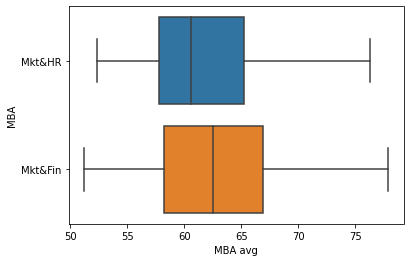

In [58]:
sns.boxplot(x = "MBA avg",y = "MBA",data = MBA1)
plt.savefig("MBAavg.png")

##Relationship between the Degree avg and the MBA avg 

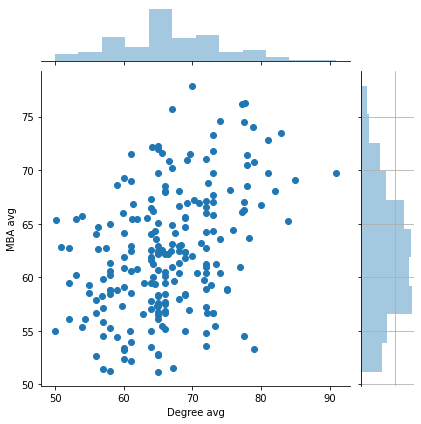

In [56]:
sns.jointplot("Degree avg","MBA avg",MBA1)
plt.grid()
plt.savefig("avgdist.png")

##Gender distribution in the MBAs 

In [29]:
x = MBA1[MBA1["MBA"]=="Mkt&HR"]["Gender"]

In [30]:
X = x.value_counts()

In [31]:
X1 = pd.DataFrame(X)
X2 = X1.rename(columns={"Gender":"Mkt&HR"})

In [32]:
y = MBA1[MBA1["MBA"]=="Mkt&Fin"]["Gender"]

In [33]:
Y = y.value_counts()

In [34]:
Y1 = pd.DataFrame(Y)
Y1.rename(columns={"Gender":"Mkt&Fin"})
Y2 = Y1.rename(columns={"Gender":"Mkt&Fin"})

In [35]:
a = pd.concat([Y2,X2],axis=1)

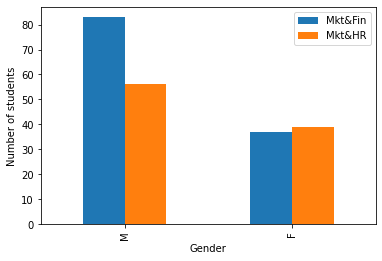

In [55]:
a.plot.bar()
plt.ylabel("Number of students")
plt.xlabel("Gender")
plt.savefig("GenderBar.png")

##Bining the salaries 

In [37]:
df = pd.read_csv("CLAS.csv")

In [38]:
bining = df["salary"]

In [39]:
BINING = df.dropna(thresh=df.shape[1]-0)

In [40]:
BINING

,Unnamed: 0,sl_no,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,specialisation,mba_p,status,salary
0,0,1,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,Mkt&HR,58.80,Placed,270000.0
1,1,2,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,Mkt&Fin,66.28,Placed,200000.0
2,2,3,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,Mkt&Fin,57.80,Placed,250000.0
4,4,5,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,Mkt&Fin,55.50,Placed,425000.0
7,7,8,M,82.00,64.00,Science,66.00,Sci&Tech,Yes,Mkt&Fin,62.14,Placed,252000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,209,210,M,62.00,72.00,Commerce,65.00,Comm&Mgmt,No,Mkt&Fin,56.49,Placed,216000.0
210,210,211,M,80.60,82.00,Commerce,77.60,Comm&Mgmt,No,Mkt&Fin,74.49,Placed,400000.0
211,211,212,M,58.00,60.00,Science,72.00,Sci&Tech,No,Mkt&Fin,53.62,Placed,275000.0
212,212,213,M,67.00,67.00,Commerce,73.00,Comm&Mgmt,Yes,Mkt&Fin,69.72,Placed,295000.0


In [41]:
BINING2 = BINING["salary"]

In [42]:
PLOT = pd.cut(BINING2,bins=[199999,300000,400000,500000,600000,700000,800000,900000,1000000],labels=["2-3","3-4","4-5","5-6","6-7","7-8","8-9","9-10"])


In [43]:
x = PLOT.value_counts()

In [44]:
x

2-3     120
3-4      18
4-5       7
6-7       2
9-10      1
8-9       0
7-8       0
5-6       0
Name: salary, dtype: int64

In [45]:
r = lambda x : plt.pie(x)

([<matplotlib.patches.Wedge at 0x122a9e5c0>,
 [Text(-0.9113606016987157, 0.6159722832005958, ''),
  Text(0.7611327287461934, -0.7941517293511196, ''),
  Text(1.0583832547241618, -0.29970800142720583, ''),
  Text(1.0960372358402772, -0.09328653521063178, ''),
  Text(1.0997521874386846, -0.02334793832073062, ''),
  Text(1.0999999999999999, -1.6092098856417306e-08, ''),
  Text(1.0999999999999999, -1.6092098856417306e-08, ''),
  Text(1.0999999999999999, -1.6092098856417306e-08, '')])

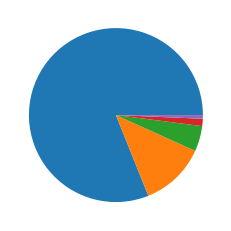

In [46]:
r(x)
plt.

In [47]:
BINING

,Unnamed: 0,sl_no,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,specialisation,mba_p,status,salary
0,0,1,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,Mkt&HR,58.80,Placed,270000.0
1,1,2,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,Mkt&Fin,66.28,Placed,200000.0
2,2,3,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,Mkt&Fin,57.80,Placed,250000.0
4,4,5,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,Mkt&Fin,55.50,Placed,425000.0
7,7,8,M,82.00,64.00,Science,66.00,Sci&Tech,Yes,Mkt&Fin,62.14,Placed,252000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,209,210,M,62.00,72.00,Commerce,65.00,Comm&Mgmt,No,Mkt&Fin,56.49,Placed,216000.0
210,210,211,M,80.60,82.00,Commerce,77.60,Comm&Mgmt,No,Mkt&Fin,74.49,Placed,400000.0
211,211,212,M,58.00,60.00,Science,72.00,Sci&Tech,No,Mkt&Fin,53.62,Placed,275000.0
212,212,213,M,67.00,67.00,Commerce,73.00,Comm&Mgmt,Yes,Mkt&Fin,69.72,Placed,295000.0


In [48]:
def string(x):
    return str(x)

In [49]:
BINING["Str_salary"]=BINING.salary.apply(string)

/Users/diegocaulonga/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
BINING

,Unnamed: 0,sl_no,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,specialisation,mba_p,status,salary,Str_salary
0,0,1,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,Mkt&HR,58.80,Placed,270000.0,270000.0
1,1,2,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,Mkt&Fin,66.28,Placed,200000.0,200000.0
2,2,3,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,Mkt&Fin,57.80,Placed,250000.0,250000.0
4,4,5,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,Mkt&Fin,55.50,Placed,425000.0,425000.0
7,7,8,M,82.00,64.00,Science,66.00,Sci&Tech,Yes,Mkt&Fin,62.14,Placed,252000.0,252000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,209,210,M,62.00,72.00,Commerce,65.00,Comm&Mgmt,No,Mkt&Fin,56.49,Placed,216000.0,216000.0
210,210,211,M,80.60,82.00,Commerce,77.60,Comm&Mgmt,No,Mkt&Fin,74.49,Placed,400000.0,400000.0
211,211,212,M,58.00,60.00,Science,72.00,Sci&Tech,No,Mkt&Fin,53.62,Placed,275000.0,275000.0
212,212,213,M,67.00,67.00,Commerce,73.00,Comm&Mgmt,Yes,Mkt&Fin,69.72,Placed,295000.0,295000.0


In [51]:
def clean(x):
    return x.split(".")[0]+x.split(".")[1].replace("0","")

In [52]:
BINING["SALARY"]=BINING.Str_salary.apply(clean)

/Users/diegocaulonga/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
BINING

,Unnamed: 0,sl_no,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,specialisation,mba_p,status,salary,Str_salary,SALARY
0,0,1,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,Mkt&HR,58.80,Placed,270000.0,270000.0,270000
1,1,2,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,Mkt&Fin,66.28,Placed,200000.0,200000.0,200000
2,2,3,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,Mkt&Fin,57.80,Placed,250000.0,250000.0,250000
4,4,5,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,Mkt&Fin,55.50,Placed,425000.0,425000.0,425000
7,7,8,M,82.00,64.00,Science,66.00,Sci&Tech,Yes,Mkt&Fin,62.14,Placed,252000.0,252000.0,252000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,209,210,M,62.00,72.00,Commerce,65.00,Comm&Mgmt,No,Mkt&Fin,56.49,Placed,216000.0,216000.0,216000
210,210,211,M,80.60,82.00,Commerce,77.60,Comm&Mgmt,No,Mkt&Fin,74.49,Placed,400000.0,400000.0,400000
211,211,212,M,58.00,60.00,Science,72.00,Sci&Tech,No,Mkt&Fin,53.62,Placed,275000.0,275000.0,275000
212,212,213,M,67.00,67.00,Commerce,73.00,Comm&Mgmt,Yes,Mkt&Fin,69.72,Placed,295000.0,295000.0,295000
